# Youtube - Trending Video Analytics Reviewer
## Data Analytics with Python Course - Final Assessment
## Analyzing, Part 2 of 2
submitted by: Ramon (Monch) Mercader

Please use README.md and Project_Backgroun.md files for more information on how to use this file.<br>

In [1]:
#Imported libraries
import os
import glob
import requests
import numpy as np
import pandas as pd
import datetime
from collections import Counter
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

print("all items imported") #Using this as a status to indicate that all the imports are completed

all items imported


## Loading all Final Total CSV files

In [2]:
#Housekeeping, check your current working directory and make sure you are inside Final_Assessment (or the main directory with datasets folder)
#You will need to use the output of this cell as your path in the next cell
#The folder should have the files and the datasets folder inside the current working directory
os.getcwd()

'C:\\Users\\monch.mercader\\Python\\Data_Analytics\\Module 1\\Final_Assessment'

In [179]:
#Load all previously saved CSV files from datasets\Final_CSV folder
#Each file will be loaded into their respective Country dataframes
#This uses an absolute path and os.path.join to make it OS independent

#For Macs path, replace the path below to your own:
#path = r'//Users/monchmercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets'
#AU_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_AU.csv'))
#US_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_US.csv'))
#NZ_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_NZ.csv'))
#GB_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_GB.csv'))
#PH_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_PH.csv'))
#SG_Analysis_df = (pd.read_csv(r'//Users/monch.mercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets/Final_CSV\FINAL_TOTAL_SG.csv'))


#For Windows path, replace the path below to your own:
AU_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_AU.csv'))
US_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_US.csv'))
NZ_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_NZ.csv'))
GB_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_GB.csv'))
PH_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_PH.csv'))
SG_Analysis_df = (pd.read_csv(r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets\Final_CSV\FINAL_TOTAL_SG.csv'))

In [5]:
#Quick check if the data loaded is correct, just replace the first two country code letters with whichever data you want to check

US_Analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         52 non-null     int64 
 1   video_id           52 non-null     object
 2   title              52 non-null     object
 3   publishedAt        52 non-null     object
 4   channelId          52 non-null     object
 5   channelTitle       52 non-null     object
 6   categoryId         52 non-null     int64 
 7   trending_date      52 non-null     object
 8   tags               52 non-null     object
 9   view_count         52 non-null     int64 
 10  likes              52 non-null     int64 
 11  dislikes           52 non-null     int64 
 12  comment_count      52 non-null     int64 
 13  thumbnail_link     52 non-null     object
 14  comments_disabled  52 non-null     bool  
 15  ratings_disabled   52 non-null     bool  
 16  description        52 non-null     object
dtyp

### 5. Analysis:<br>
The Analysis will be done first on a per country, and then across all countries. <br>
    1. What are the top trending category per country within a certain period?<br>
    2. How many views does it take to become a trending video?<br>
    3. How long does a video stay trending on average?<br>
    4. What categories are currently trending?<br>
    5. Do comments play a role in making a video trend?<br>


### 6. Visualizations<br>
Static Visualizations, across all countries:<br>
    1. Views vs Likes vs Unlikes<br>
    2. Views vs Comments<br>
    3. Trending categories<br>
Interactive Visualizations:<br>
    1. <br>

2. <br>

In [105]:
#This picks the unique categories, and the category counts, then passes them to a variable
#This is important to plot out the charts

US_x_edited_bar = US_Analysis_df['categoryId'].value_counts().tolist()
US_y_bar = US_Analysis_df['categoryId'].unique()

AU_x_edited_bar = AU_Analysis_df['categoryId'].value_counts().tolist()
AU_y_bar = AU_Analysis_df['categoryId'].unique()

GB_x_edited_bar = GB_Analysis_df['categoryId'].value_counts().tolist()
GB_y_bar = GB_Analysis_df['categoryId'].unique()

NZ_x_edited_bar = NZ_Analysis_df['categoryId'].value_counts().tolist()
NZ_y_bar = NZ_Analysis_df['categoryId'].unique()

PH_x_edited_bar = PH_Analysis_df['categoryId'].value_counts().tolist()
PH_y_bar = PH_Analysis_df['categoryId'].unique()

SG_x_edited_bar = SG_Analysis_df['categoryId'].value_counts().tolist()
SG_y_bar = SG_Analysis_df['categoryId'].unique()
print("Task completed")

Task completed


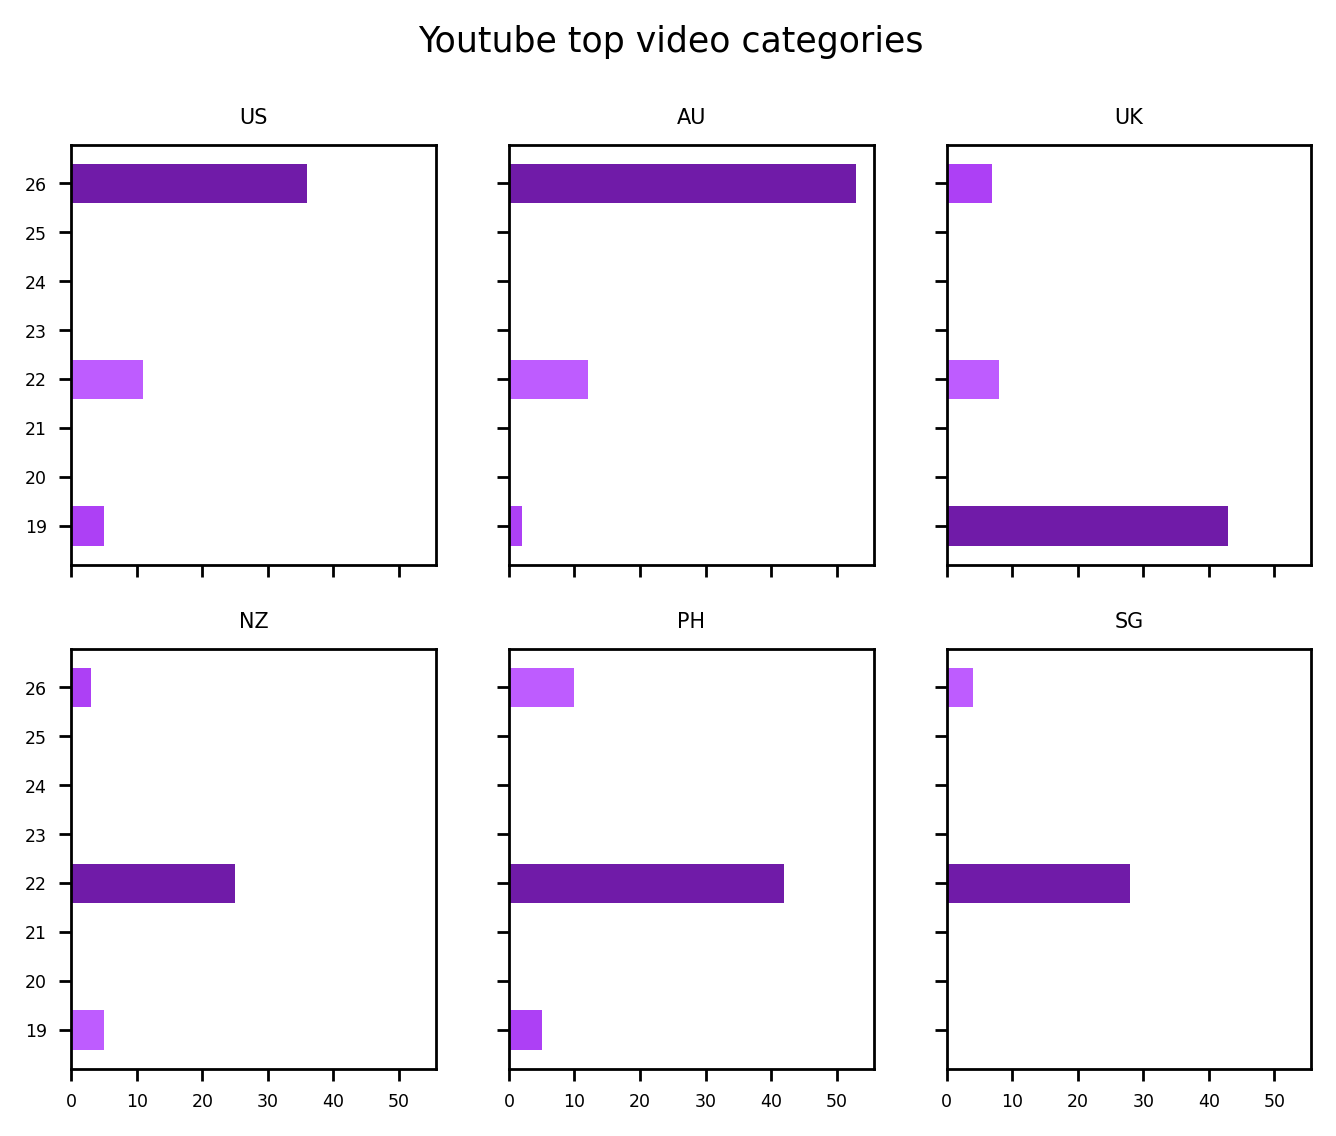

In [154]:
#Plotting the Horizontal bar graphs for top video categories per country

plt.rcdefaults()
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, dpi=250)

fig.suptitle("Youtube top video categories", fontsize=10)

ax[0, 0].barh(US_y_bar, US_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 0].tick_params(labelsize=5)
ax[0, 0].set_title("US", fontsize=6)

ax[0, 1].barh(AU_y_bar, AU_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 1].tick_params(labelsize=5)
ax[0, 1].set_title("AU", fontsize=6)

ax[0, 2].barh(GB_y_bar, GB_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[0, 2].tick_params(labelsize=5)
ax[0, 2].set_title("UK", fontsize=6)

ax[1, 0].barh(NZ_y_bar, NZ_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 0].tick_params(labelsize=5)
ax[1, 0].set_title("NZ", fontsize=6)

ax[1, 1].barh(PH_y_bar, PH_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 1].tick_params(labelsize=5)
ax[1, 1].set_title("PH", fontsize=6)

ax[1, 2].barh(SG_y_bar, SG_x_edited_bar, color=('#701BA8', '#BE5CFF', '#AD40F5'), label="CategoryId")
ax[1, 2].tick_params(labelsize=5)
ax[1, 2].set_title("SG", fontsize=6)

plt.show()

### Relevant Youtube category index:
- 37 = Family<br>
- 26 = How To & Style<br>
- 22 = People & Blogs<br>
- 21 = Video blogging<br>
- 19 = Travel & Events<br>

In [138]:
#Creating the value for plotting on the views vs likes vs dislikes graphs
AU_index = AU_Analysis_df.index
AU_views = AU_Analysis_df['view_count']
AU_likes = AU_Analysis_df['likes']
AU_dislikes = AU_Analysis_df['dislikes']

PH_index = PH_Analysis_df.index
PH_views = PH_Analysis_df['view_count']
PH_likes = PH_Analysis_df['likes']
PH_dislikes = PH_Analysis_df['dislikes']

SG_index = SG_Analysis_df.index
SG_views = SG_Analysis_df['view_count']
SG_likes = SG_Analysis_df['likes']
SG_dislikes = SG_Analysis_df['dislikes']

NZ_index = NZ_Analysis_df.index
NZ_views = NZ_Analysis_df['view_count']
NZ_likes = NZ_Analysis_df['likes']
NZ_dislikes = NZ_Analysis_df['dislikes']

GB_index = GB_Analysis_df.index
GB_views = GB_Analysis_df['view_count']
GB_likes = GB_Analysis_df['likes']
GB_dislikes = GB_Analysis_df['dislikes']

US_index = US_Analysis_df.index
US_views = US_Analysis_df['view_count']
US_likes = US_Analysis_df['likes']
US_dislikes = US_Analysis_df['dislikes']

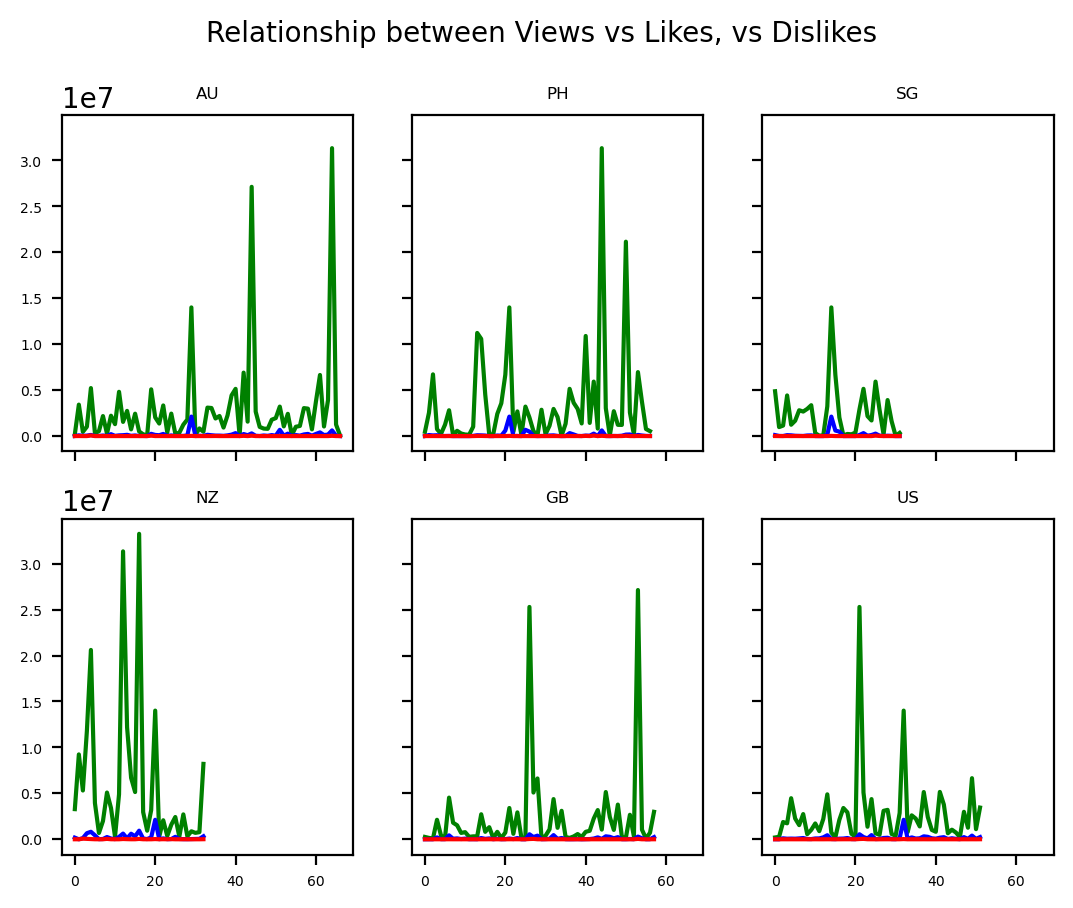

In [153]:
#Plotting the viewcount vs Likes vs dislikes relationship graph
plt.rcdefaults()
view_fig, v_axs = plt.subplots(nrows = 2, ncols = 3, sharey=True, sharex=True, dpi=200)

view_fig.suptitle("Relationship between Views vs Likes, vs Dislikes", fontsize=10)

#AUS
v_axs[0,0].plot(AU_index, AU_views, color='green')
v_axs[0,0].plot(AU_index, AU_likes, color='blue')
v_axs[0,0].plot(AU_index, AU_dislikes, color='red')
v_axs[0, 0].tick_params(labelsize=5)
v_axs[0,0].set_title("AU", fontsize=6)
#PH
v_axs[0,1].plot(PH_index, PH_views, color='green')
v_axs[0,1].plot(PH_index, PH_likes, color='blue')
v_axs[0,1].plot(PH_index, PH_dislikes, color='red')
v_axs[0,1].set_title("PH", fontsize=6)
#SG
v_axs[0,2].plot(SG_index, SG_views, color='green')
v_axs[0,2].plot(SG_index, SG_likes, color='blue')
v_axs[0,2].plot(SG_index, SG_dislikes, color='red')
v_axs[0,2].set_title("SG", fontsize=6)
#NZ
v_axs[1,0].plot(NZ_index, NZ_views, color='green')
v_axs[1,0].plot(NZ_index, NZ_likes, color='blue')
v_axs[1,0].plot(NZ_index, NZ_dislikes, color='red')
v_axs[1,0].tick_params(labelsize=5)
v_axs[1,0].set_title("NZ", fontsize=6)
#GB
v_axs[1,1].plot(GB_index, GB_views, color='green')
v_axs[1,1].plot(GB_index, GB_likes, color='blue')
v_axs[1,1].plot(GB_index, GB_dislikes, color='red')
v_axs[1,1].tick_params(labelsize=5)
v_axs[1,1].set_title("GB", fontsize=6)
#US
v_axs[1,2].plot(US_index, US_views, color='green')
v_axs[1,2].plot(US_index, US_likes, color='blue')
v_axs[1,2].plot(US_index, US_dislikes, color='red')
v_axs[1,2].tick_params(labelsize=5)
v_axs[1,2].set_title("US", fontsize=6)

plt.show()

In [169]:
#print(US_Analysis_df.publishedAt)

dataTypeDict = dict(US_Analysis_df.dtypes)
print('Data type of each column of Dataframe :')
print(dataTypeDict)

Data type of each column of Dataframe :
{'Unnamed: 0': dtype('int64'), 'video_id': dtype('O'), 'title': dtype('O'), 'publishedAt': dtype('O'), 'channelId': dtype('O'), 'channelTitle': dtype('O'), 'categoryId': dtype('int64'), 'trending_date': dtype('O'), 'tags': dtype('O'), 'view_count': dtype('int64'), 'likes': dtype('int64'), 'dislikes': dtype('int64'), 'comment_count': dtype('int64'), 'thumbnail_link': dtype('O'), 'comments_disabled': dtype('bool'), 'ratings_disabled': dtype('bool'), 'description': dtype('O')}


In [181]:
#Standardizing the dates, removing last 10 characters of string from publishAt column. Run only once, otherwise, you will need to reload the csv into the dataframe.
US_Analysis_df['publishedAt'] = US_Analysis_df['publishedAt'].str[:-10]

In [195]:
#Convert trending date to same format as publishedAt
US_Analysis_df['publishedAt'] = pd.to_datetime(US_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')

In [219]:
AU_Analysis_df.head(50)

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,162,S6aXAwYT6nY,MY LAST PREGNANCY UPDATE ON THE TWINS | OUR UL...,2021-01-04,UC_0mlge_fLewbr5P8YEL2tA,THE WEISS LIFE,26,2021-01-11,pregnancy update on the twins!|unexpected news...,199889,9208,309,0,https://i.ytimg.com/vi/S6aXAwYT6nY/default.jpg,True,False,Don't forget to subscribe! http://www.youtube....
1,171,4_Vp3FhrzTk,EATING MASSIVE SEA URCHIN,2020-12-17,UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,22,2021-01-11,[none],3422355,80402,5955,3326,https://i.ytimg.com/vi/4_Vp3FhrzTk/default.jpg,False,False,Uni is certainly not for everybody. It's a bla...
2,172,2Al7H9AiN1A,Positive 2021 Goals! 12 Unique Ab Exercises & ...,2020-12-31,UCAHufvd02viJSRdt3ojdPOg,Sarahs Day,22,2021-01-11,new years resolution|goals|setting goals|new y...,455438,26518,190,1028,https://i.ytimg.com/vi/2Al7H9AiN1A/default.jpg,False,False,SWEAT IT TO SHRED IT EBOOK FITNESS GUIDES!!htt...
3,178,FnYI8chEJ_w,DIY Resin Keycaps (we almost failed),2021-01-01,UCUuMYw2l2UeWyTGYixYfRCA,EvanAndKatelyn,26,2021-01-11,keycaps|key caps|keycap|key cap|DIY keycap|DIY...,1017675,52316,681,5299,https://i.ytimg.com/vi/FnYI8chEJ_w/default.jpg,False,False,Strap in for a JOURNEY where we try making res...
4,183,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,22,2021-01-11,jake paul,5224087,122752,65041,26366,https://i.ytimg.com/vi/p19cjKg8dIc/default.jpg,False,False,new chapter...text me im bored - 310-870-3349🔴...
5,190,48NAQCSnHdQ,When your Dad is cooler than you,2020-12-29,UCJf7YEdkEV33UXnm0gLzwvA,Jimi Jackson,22,2021-01-11,[none],308037,17135,115,975,https://i.ytimg.com/vi/48NAQCSnHdQ/default.jpg,False,False,Shout out to Apex Legends for sponsoring this ...
6,469,m4rAQlCfJsw,Smashed potatoes are the best,2021-01-09,UC19OYOBqkgVqgTIQxbsPdlw,ThatDudeCanCook,22,2021-01-14,[none],536079,17196,963,495,https://i.ytimg.com/vi/m4rAQlCfJsw/default.jpg,False,False,#shorts #potatoSmashed potatoes are a fantasti...
7,537,qzFXj3YW01A,My Among Us Birthday 🙄,2021-01-01,UCECfNdmd7m2FnmfvWeFoGpg,BriannaShorts,22,2021-01-14,brianna|briannashorts|brianna shorts|briannapl...,2180071,60841,2462,1929,https://i.ytimg.com/vi/qzFXj3YW01A/default.jpg,False,False,My Among Us Birthday ... Brianna and her Impos...
8,539,rJ-FEfXzKIY,STEPHEN TRIES vs CALFREEZY | Park The Bus Epis...,2021-01-07,UCIgl4k5noP5bHyqFqSccy_Q,UMM,22,2021-01-14,umm|umm football|umm channel|harry pinero|harr...,268167,12015,110,275,https://i.ytimg.com/vi/rJ-FEfXzKIY/default.jpg,False,False,Subscribe to UMM ► https://bit.ly/UMMofficial1...
9,540,aTLPHmrr-cM,Something we want to tell you!,2021-01-04,UCHUE4ypXKp7ZkmdWbGJNgJg,AmazingPhil,22,2021-01-14,dan and phil|dan and phil 2021|life update|lif...,2217508,208637,1359,16287,https://i.ytimg.com/vi/aTLPHmrr-cM/default.jpg,False,False,Where has Dan been?! What are our future plans...


In [202]:
#converting string dates to date objects
US_Analysis_df['publishedAt'] = pd.to_datetime(US_Analysis_df['publishedAt'], format='%y.%d.%m')
US_Analysis_df['trending_date'] = pd.to_datetime(US_Analysis_df['trending_date'], format='%y.%d.%m')

In [204]:
#Subtracting trend date from publish date to see how long it took to trend
US_timetotrend = (US_Analysis_df['trending_date'] - US_Analysis_df['publishedAt']).dt.days

In [ ]:
PH_timetotrend

In [209]:
#Standardizing the dates, removing last 10 characters of string from publishAt column. Run only once, otherwise, you will need to reload the csv into the dataframe.
PH_Analysis_df['publishedAt'] = PH_Analysis_df['publishedAt'].str[:-10]

#Convert trending date to same format as publishedAt
PH_Analysis_df['publishedAt'] = pd.to_datetime(PH_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
PH_Analysis_df['publishedAt'] = pd.to_datetime(PH_Analysis_df['publishedAt'], format='%y.%d.%m')
PH_Analysis_df['trending_date'] = pd.to_datetime(PH_Analysis_df['trending_date'], format='%y.%d.%m')
PH_timetotrend = (PH_Analysis_df['trending_date'] - PH_Analysis_df['publishedAt']).dt.days

AU_Analysis_df['publishedAt'] = pd.to_datetime(AU_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
AU_Analysis_df['publishedAt'] = pd.to_datetime(AU_Analysis_df['publishedAt'], format='%y.%d.%m')
AU_Analysis_df['trending_date'] = pd.to_datetime(AU_Analysis_df['trending_date'], format='%y.%d.%m')
AU_timetotrend = (AU_Analysis_df['trending_date'] - AU_Analysis_df['publishedAt']).dt.days

GB_Analysis_df['publishedAt'] = pd.to_datetime(GB_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
GB_Analysis_df['publishedAt'] = pd.to_datetime(GB_Analysis_df['publishedAt'], format='%y.%d.%m')
GB_Analysis_df['trending_date'] = pd.to_datetime(GB_Analysis_df['trending_date'], format='%y.%d.%m')
GB_timetotrend = (GB_Analysis_df['trending_date'] - GB_Analysis_df['publishedAt']).dt.days

SG_Analysis_df['publishedAt'] = pd.to_datetime(SG_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
SG_Analysis_df['publishedAt'] = pd.to_datetime(SG_Analysis_df['publishedAt'], format='%y.%d.%m')
SG_Analysis_df['trending_date'] = pd.to_datetime(SG_Analysis_df['trending_date'], format='%y.%d.%m')
SG_timetotrend = (SG_Analysis_df['trending_date'] - SG_Analysis_df['publishedAt']).dt.days

NZ_Analysis_df['publishedAt'] = pd.to_datetime(NZ_Analysis_df['publishedAt']).dt.strftime('%y.%d.%m')
NZ_Analysis_df['publishedAt'] = pd.to_datetime(NZ_Analysis_df['publishedAt'], format='%y.%d.%m')
NZ_Analysis_df['trending_date'] = pd.to_datetime(NZ_Analysis_df['trending_date'], format='%y.%d.%m')
NZ_timetotrend = (NZ_Analysis_df['trending_date'] - NZ_Analysis_df['publishedAt']).dt.days

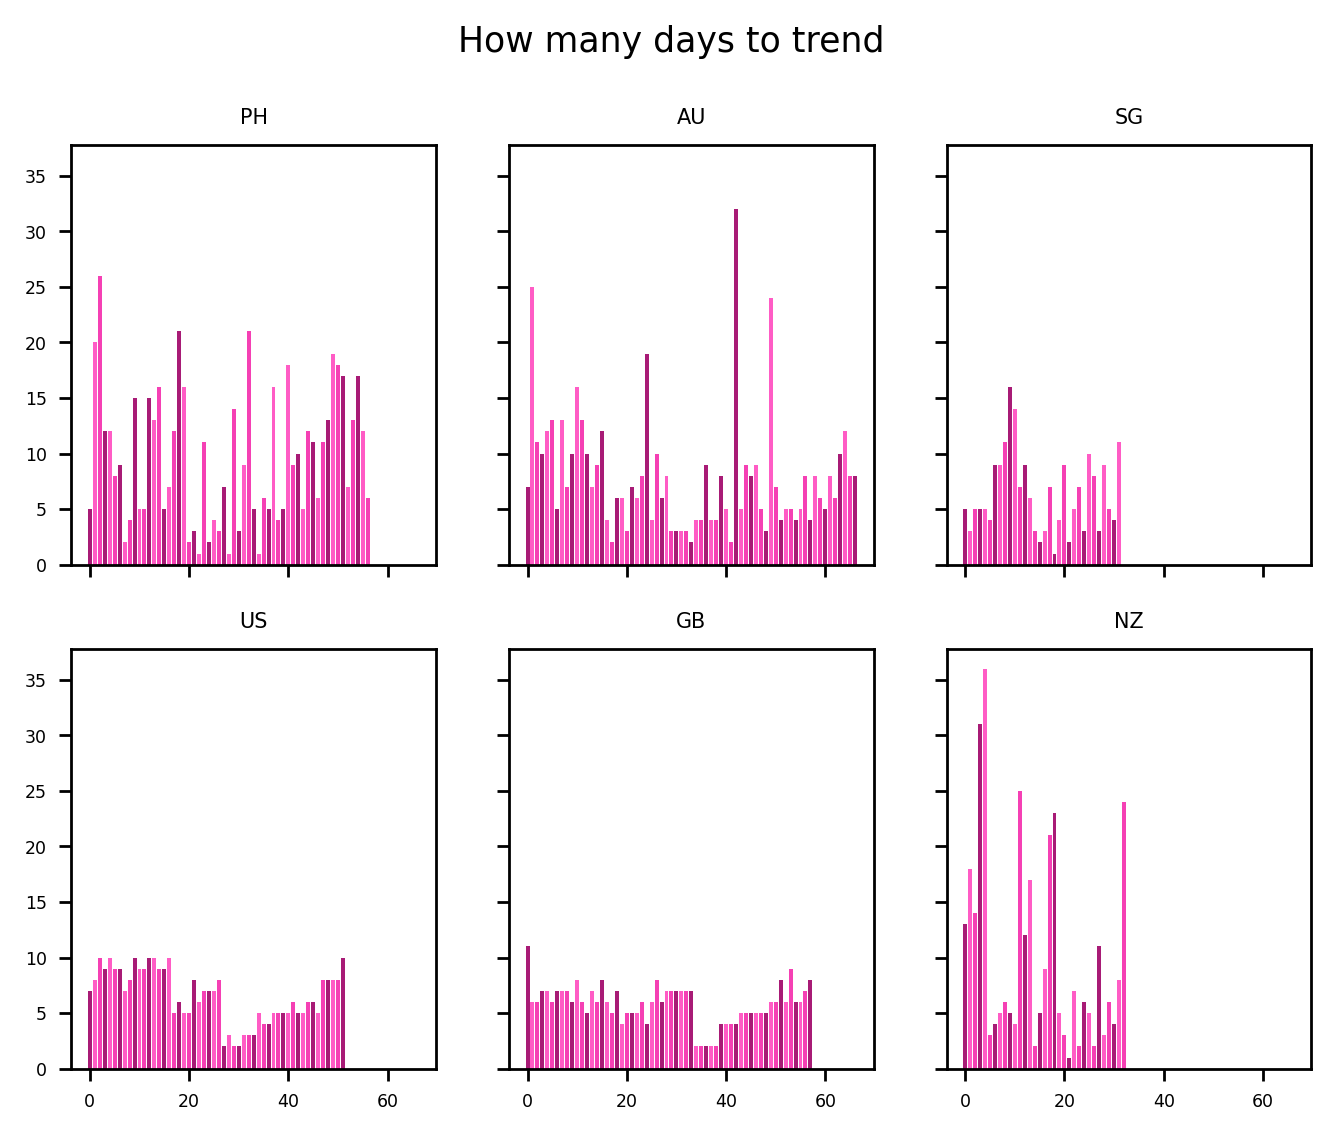

In [215]:
#Plotting a graph on how many days it takes from publishing to trending per country
plt.rcdefaults()
trend_fig, trend_ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, dpi=250)

trend_fig.suptitle("How many days to trend", fontsize=10)

trend_ax[0, 0].bar(PH_index, PH_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 0].tick_params(labelsize=5)
trend_ax[0, 0].set_title("PH", fontsize=6)

trend_ax[0, 1].bar(AU_index, AU_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 1].tick_params(labelsize=5)
trend_ax[0, 1].set_title("AU", fontsize=6)

trend_ax[0, 2].bar(SG_index, SG_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[0, 2].tick_params(labelsize=5)
trend_ax[0, 2].set_title("SG", fontsize=6)

trend_ax[1, 0].bar(US_index, US_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 0].tick_params(labelsize=5)
trend_ax[1, 0].set_title("US", fontsize=6)

trend_ax[1, 1].bar(GB_index, GB_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 1].tick_params(labelsize=5)
trend_ax[1, 1].set_title("GB", fontsize=6)

trend_ax[1, 2].bar(NZ_index, NZ_timetotrend, color=('#A81B76', '#FF5CC5', '#F540B4'), label="Time to trend")
trend_ax[1, 2].tick_params(labelsize=5)
trend_ax[1, 2].set_title("NZ", fontsize=6)

plt.show()